<a href="https://colab.research.google.com/github/durveshali49/LOAN-APPROVAL-PREDICTION/blob/main/Loan_Approval_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Loan_Prediction_Dataset.csv")

**Exploratory Data Analysis (EDA):**

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,Unmarried,Male,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,Married,Male,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,Married,Female,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,Unmarried,Male,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,Married,Male,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,Unmarried,Male,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,Unmarried,Male,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,Unmarried,Male,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,Unmarried,Female,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,Unmarried,Female,12000000,Approved


In [5]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'marital_status', 'Gender',
       'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
marital_status,0


In [7]:
data.shape

(4269, 13)

In [8]:
#Summary Statistics of Loan Amount in Dataset
mean_df=data["loan_amount"].mean()
median_df=data["loan_amount"].median()
sum_df=data["loan_amount"].sum()
print("Sum:",sum_df,"\nMean:",mean_df,"\nMedian:",median_df)

Sum: 64604700000 
Mean: 15133450.456781447 
Median: 14500000.0


In [9]:
#Range of Loan Amount in Dataset
min_df=data["loan_amount"].min()
max_df=data["loan_amount"].max()
print("Minimum:",min_df,"\nMaximum:",max_df)

Minimum: 300000 
Maximum: 39500000


In [10]:
#Gender Distribution of Loan Applicants
countMale = len(data[data.Gender == 'Male'])
countFemale = len(data[data.Gender == 'Female'])
countNull = len(data[data.Gender.isnull()])

print("Percentage of Male applicants: {:.2f}%".format((countMale / len(data.Gender))*100))
print("Percentage of Female applicants: {:.2f}%".format((countFemale / len(data.Gender))*100))

Percentage of Male applicants: 67.21%
Percentage of Female applicants: 32.79%


# **DATA VISUALIZATION:**

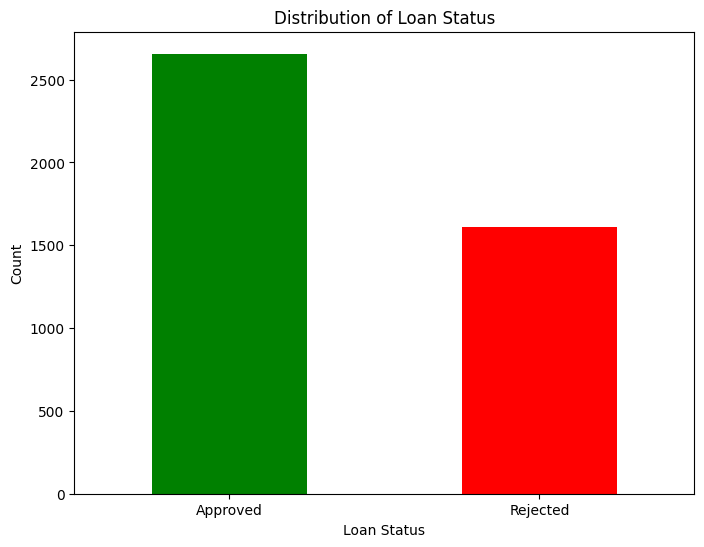

In [11]:
import matplotlib.pyplot as plt

# Bar plot of loan status
plt.figure(figsize=(8, 6))
data['loan_status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

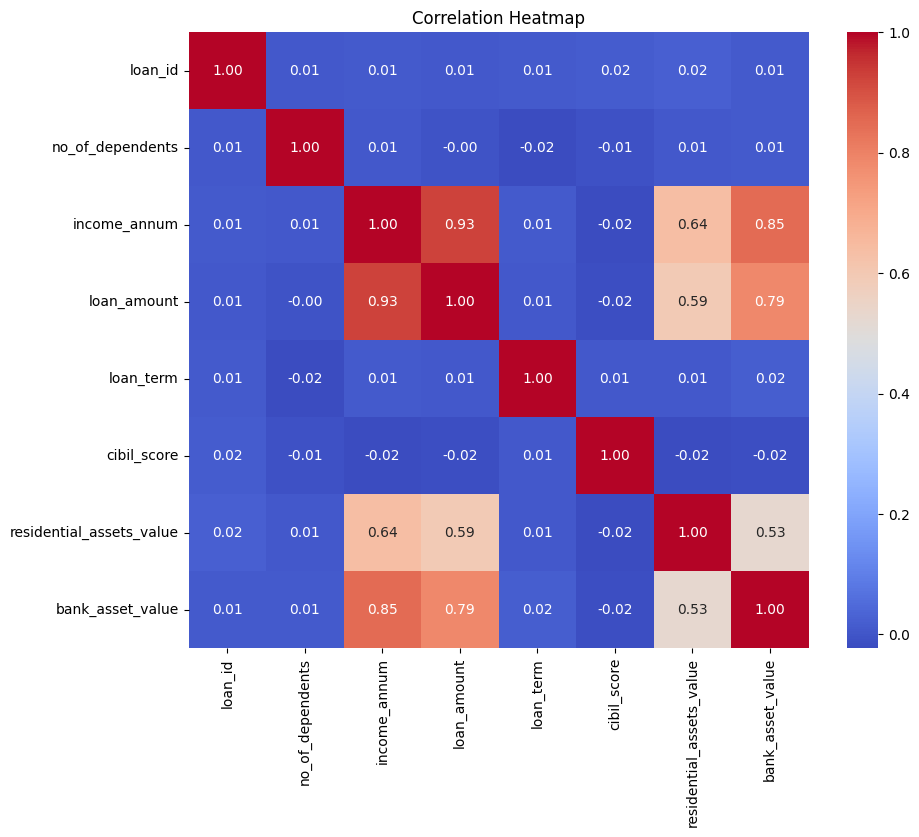

In [12]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Bar Plot of Categorical Features:**

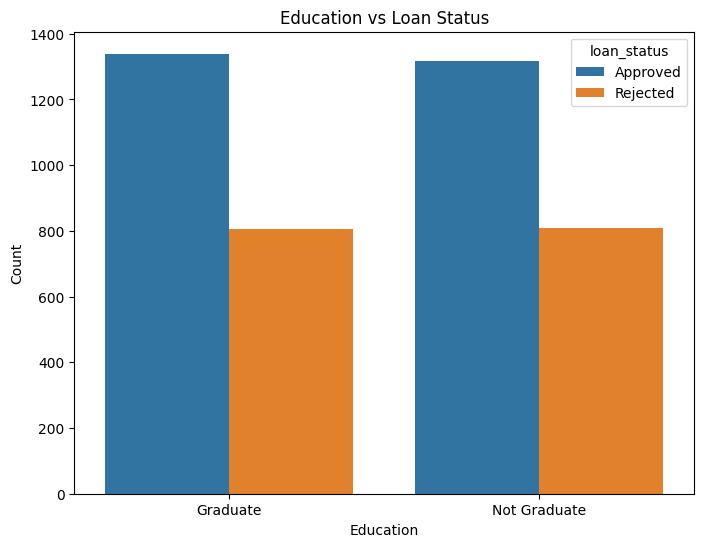

In [13]:
# Bar plot of education
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Similar plots for other categorical features

# **Histograms or KDE Plots:**

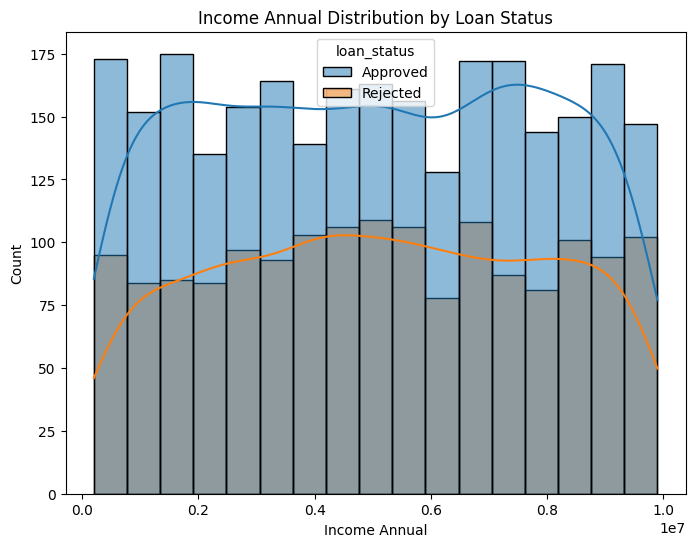

In [14]:
# Histogram for income_annum
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='income_annum', hue='loan_status', kde=True)
plt.title('Income Annual Distribution by Loan Status')
plt.xlabel('Income Annual')
plt.ylabel('Count')
plt.show()

# Similar plots for other numerical features

# ***Box Plots or Violin Plots:***

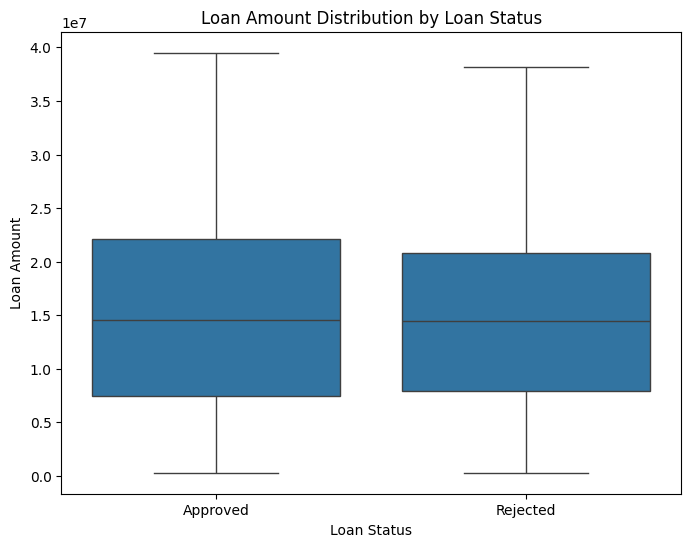

In [15]:
# Box plot for loan_amount
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='loan_status', y='loan_amount')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

# Similar plots for other numerical features

Gender
Male      2869
Female    1400
Name: count, dtype: int64


/tmp/ipython-input-3330548119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=data,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

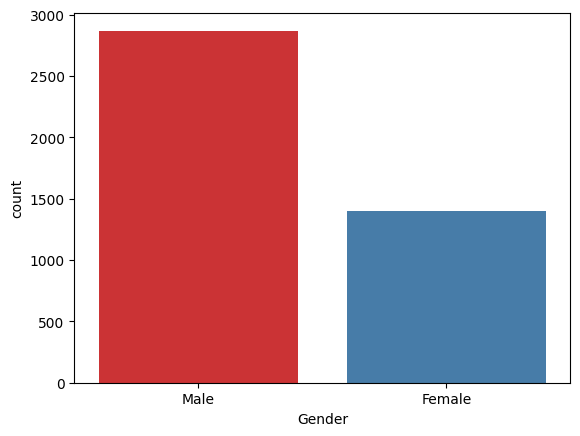

In [16]:
import seaborn as sns
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data,palette='Set1')

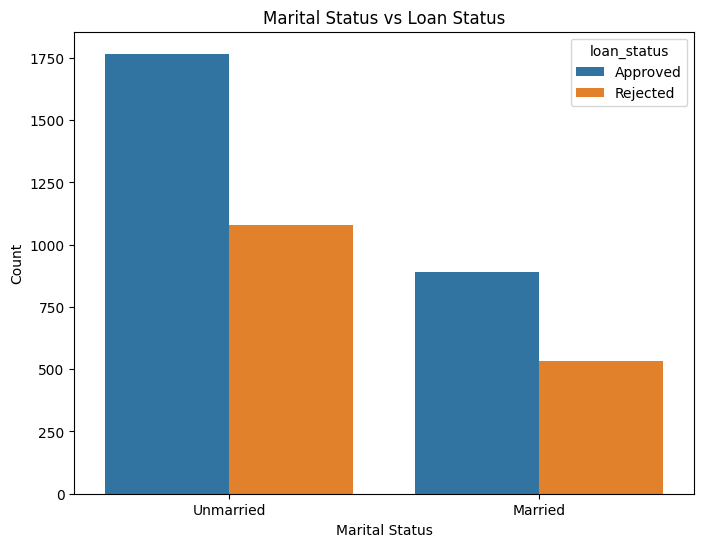

In [17]:
# Count plot for marital_status
plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', hue='loan_status', data=data)
plt.title('Marital Status vs Loan Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Similar plots for other categorical features

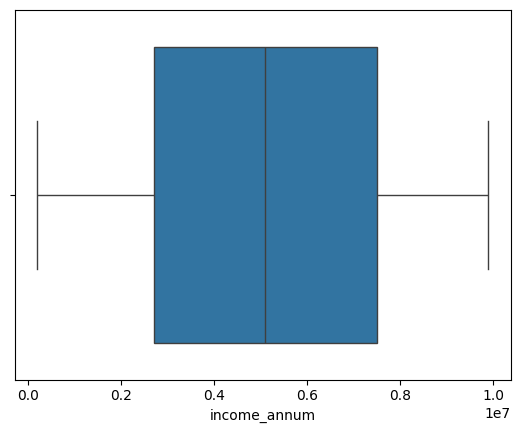

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['income_annum'])
plt.show()


Number of dependents
no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64


/tmp/ipython-input-2146846530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_dependents', data=data,palette='Set1')


<Axes: xlabel='no_of_dependents', ylabel='count'>

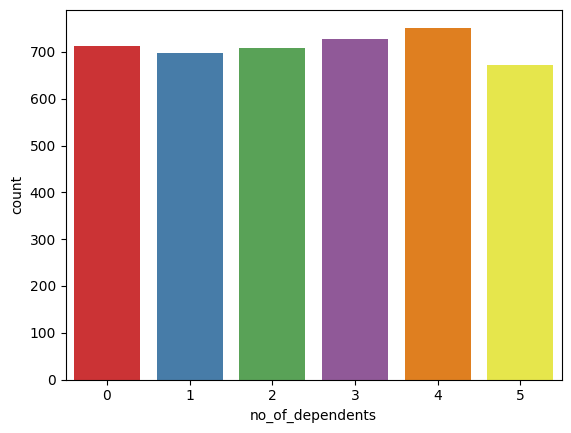

In [19]:
print("Number of dependents")
print(data['no_of_dependents'].value_counts())
sns.countplot(x='no_of_dependents', data=data,palette='Set1')

self_employed
1    2150
0    2119
Name: count, dtype: int64


<Axes: xlabel='self_employed', ylabel='count'>

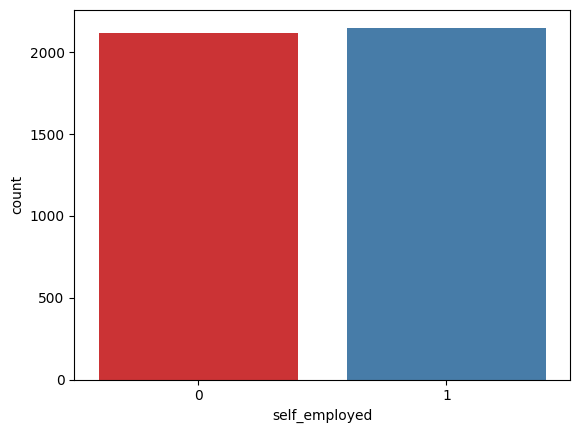

In [22]:
print(data['self_employed'].value_counts())
sns.countplot(x='self_employed', data=data, hue='self_employed', legend=False, palette='Set1')

# **Converting Categorical Values into Numerical Values:**

In [23]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original dataset
data = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))  # Convert to string before encoding

# Display the first few rows of the encoded dataset
print(data.head())

   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   marital_status  Gender  bank_asset_value  loan_status  
0               1       1           8000000            0  
1               0       1           3300

In [25]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,1,1,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,0,1,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,0,0,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,1,1,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,0,1,5000000,1


In [26]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value,loan_status
4264,4265,5,0,1,1000000,2300000,12,317,2800000,1,1,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,1,1,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,1,1,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,1,0,5800000,0
4268,4269,1,0,0,9200000,29700000,10,607,17800000,1,0,12000000,0


# **Training And Testing Dataset:**

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Splitting the dataset into training and testing sets with an 80:20 ratio
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
train_X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value
2488,2489,2,0,1,2700000,6400000,18,547,5000000,0,1,1700000
3703,3704,1,1,1,8400000,30900000,8,378,18600000,0,1,11100000
3347,3348,2,1,0,9700000,37700000,6,601,300000,1,1,11800000
3487,3488,5,1,0,6800000,18000000,12,690,17800000,0,0,9300000
3957,3958,0,1,0,4300000,11000000,4,374,7100000,1,1,4700000


In [29]:
test_X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,marital_status,Gender,bank_asset_value
1972,1973,1,0,1,8300000,17700000,10,673,23700000,1,0,4200000
528,529,2,0,1,7200000,23900000,4,559,4200000,1,1,10800000
3540,3541,1,0,0,7900000,15800000,8,551,800000,0,0,8300000
87,88,1,1,1,8700000,28300000,8,402,20400000,0,0,10200000
1621,1622,0,1,1,7200000,15600000,2,362,2700000,1,1,5900000


# ***Model Selection:***

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [31]:
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))
models.append(("SVM", SVC()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("Decision Tree", DecisionTreeClassifier()))

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the scoring metric you want to use
scoring = 'accuracy'  # You can replace 'accuracy' with any other metric like 'precision', 'recall', 'f1', etc.

result = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    if name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    result.append(cv_results)
    names.append(name)
    print(model)
    print("%s: %f" % (name, cv_results.mean()))

LogisticRegression(max_iter=1000)
Logistic Regression: 0.812582
KNeighborsClassifier()
KNN: 0.555479
RandomForestClassifier()
Random Forest: 0.974820
GradientBoostingClassifier()
Gradient Boosting: 0.983310
SVC()
SVM: 0.624594
GaussianNB()
Naive Bayes: 0.763984
DecisionTreeClassifier()
Decision Tree: 0.978035


# **Selected Model Accuracy , Precision , Recall:**

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

GB=GradientBoostingClassifier()
GB.fit(train_X,train_y)
pred=GB.predict(test_X)
print("Model Accuracy: ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:  0.9882903981264637
[[520   3]
 [  7 324]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       523
           1       0.99      0.98      0.98       331

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

